In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

%matplotlib inline

In [28]:
# Importing the groundwater measurement data in Pickle format
df_ms = pd.read_pickle("../data/processed/grundwasserdaten-NRW/GW-Messstellen.pkl")
df_ms_ws_input = pd.read_pickle("../data/processed/grundwasserdaten-NRW/GW-MessWasserstellenMerge.pkl")

# Jahresmittelbasierte Analyse der Grundwasserstandsentwicklung
In dieser Analyse wird die absolute Grundwasserstandsänderung über einen Zeitraum von zehn Jahren (2010–2019) untersucht. Hierzu werden für jedes Jahr die mittleren Grundwasserstände berechnet, die anschließend direkt miteinander verglichen werden können. Für jede Messstelle wird zunächst die Grundwasserganglinie als Funktion der Zeit (in Tagen) dargestellt. Der betrachtete Zeitraum beginnt am 01.11.2009 und endet am 31.10.2019. Die Wahl des 01. November als Startdatum entspricht dem Beginn des wasserwirtschaftlichen Jahres, also dem Zeitraum, ab dem sich der Grundwasserspiegel in der Regel erneuert.

## Bestimmung der jährlichen mittleren Grundwasserstandsänderungen
Aus der Grundgesamtheit aller Messdaten wird jede Messstelle einzeln extrahiert. Anschließend werden die Daten nach Wasserwirtschaftsjahren gruppiert, um für jedes Jahr den mittleren Grundwasserstand zu berechnen.

In [29]:
# Providing the input DataFrame
df_ms_abs_delta = df_ms[
    df_ms["messstelle_id"].isin(df_ms_ws_input.loc[:, 'messstelle_id'].unique())
].copy()

year_list = sorted(df_ms_ws_input['wwj'].unique())
avg_year = [f'avg_{str(year_list[i])}' for i in range(10)]

df_ms_abs_delta.loc[:, avg_year] = np.nan
df_ms_abs_delta.loc[:, "avg_min_year"] = pd.Series('int32')
df_ms_abs_delta.loc[:, "avg_max_year"] = pd.Series('int32')

In [30]:
df_ms_abs_delta.head()

,messstelle_id,name,e32,n32,turnus_wasserstand,freigabe_wstd,freigabe_chemie,freigabe_lage,messstellenart,avg_2010,...,avg_2012,avg_2013,avg_2014,avg_2015,avg_2016,avg_2017,avg_2018,avg_2019,avg_min_year,avg_max_year
2,070283916,LGD BN KOTTENF. 3,362354,5615873,monatlich,ja,ja,ja,GW-Messstelle,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,010445730,60BP010505,291150,5669250,vierzehntäglich,ja,nein,nein,GW-Messstelle,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,010445791,60BP010701,290850,5665750,vierzehntäglich,ja,nein,nein,GW-Messstelle,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,010446722,60GP012301,292050,5645350,monatlich,ja,nein,nein,GW-Messstelle,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,100151115,WE 33 WEHE,478750,5808550,monatlich,ja,nein,nein,GW-Messstelle,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# Calculate the average groundwater level per year
groups = df_ms_ws_input.groupby('messstelle_id')

for mess_id in df_ms_ws_input.loc[:, 'messstelle_id'].unique().tolist():
    df_mess_id = groups.get_group(mess_id)
    
    s = (
        df_mess_id
        .groupby('wwj')['wasserstd_m']
        .mean()
        )
    
    s.index = [f"avg_{int(y)}" for y in s.index]
    s = s.reindex(avg_year)
    
    mask = df_ms_abs_delta['messstelle_id'] == mess_id
    df_ms_abs_delta.loc[mask, avg_year] = s.values
    df_ms_abs_delta.loc[mask, 'avg_max_year'] = int(s.idxmax()[4:])
    df_ms_abs_delta.loc[mask, 'avg_min_year'] = int(s.idxmin()[4:])


In [32]:
df_ms_abs_delta.head()

,messstelle_id,name,e32,n32,turnus_wasserstand,freigabe_wstd,freigabe_chemie,freigabe_lage,messstellenart,avg_2010,...,avg_2012,avg_2013,avg_2014,avg_2015,avg_2016,avg_2017,avg_2018,avg_2019,avg_min_year,avg_max_year
2,070283916,LGD BN KOTTENF. 3,362354,5615873,monatlich,ja,ja,ja,GW-Messstelle,157.968262,...,157.636154,157.597153,157.759216,158.256668,158.860764,158.398453,158.025009,157.676666,2013,2016
3,010445730,60BP010505,291150,5669250,vierzehntäglich,ja,nein,nein,GW-Messstelle,NaN,...,30.624388,30.601395,30.473974,30.436245,29.735682,29.705078,29.631495,29.627205,2019,2012
4,010445791,60BP010701,290850,5665750,vierzehntäglich,ja,nein,nein,GW-Messstelle,30.927084,...,30.612633,30.871954,30.810970,30.860708,31.071995,30.650002,30.614887,30.416910,2019,2011
6,010446722,60GP012301,292050,5645350,monatlich,ja,nein,nein,GW-Messstelle,81.496254,...,81.072189,80.965340,80.842194,NaN,NaN,81.446419,81.499199,81.437012,2014,2018
7,100151115,WE 33 WEHE,478750,5808550,monatlich,ja,nein,nein,GW-Messstelle,39.873333,...,39.487499,39.514164,39.598331,39.764999,40.063335,39.716667,39.887501,39.774998,2012,2016


In [33]:
df_ms_abs_delta.shape

(11348, 21)

## Analyse der absoluten Grundwasserhöchst- und Tiefststände
In den vorhergehenden Zellen wurde für jede Messstelle das Wasserwirtschaftsjahr mit dem jeweils höchsten und niedrigsten absoluten Grundwasserstand ermittelt. In der folgenden Zelle werden die absoluten und relativen Häufigkeiten dieser Jahre berechnet und grafisch dargestellt. Auf diese Weise lässt sich erkennen, in welchen Wasserwirtschaftsjahren der Grundwasserstand über alle Messstellen hinweg insgesamt am höchsten beziehungsweise am niedrigsten war.

<Axes: xlabel='avg_max_year'>

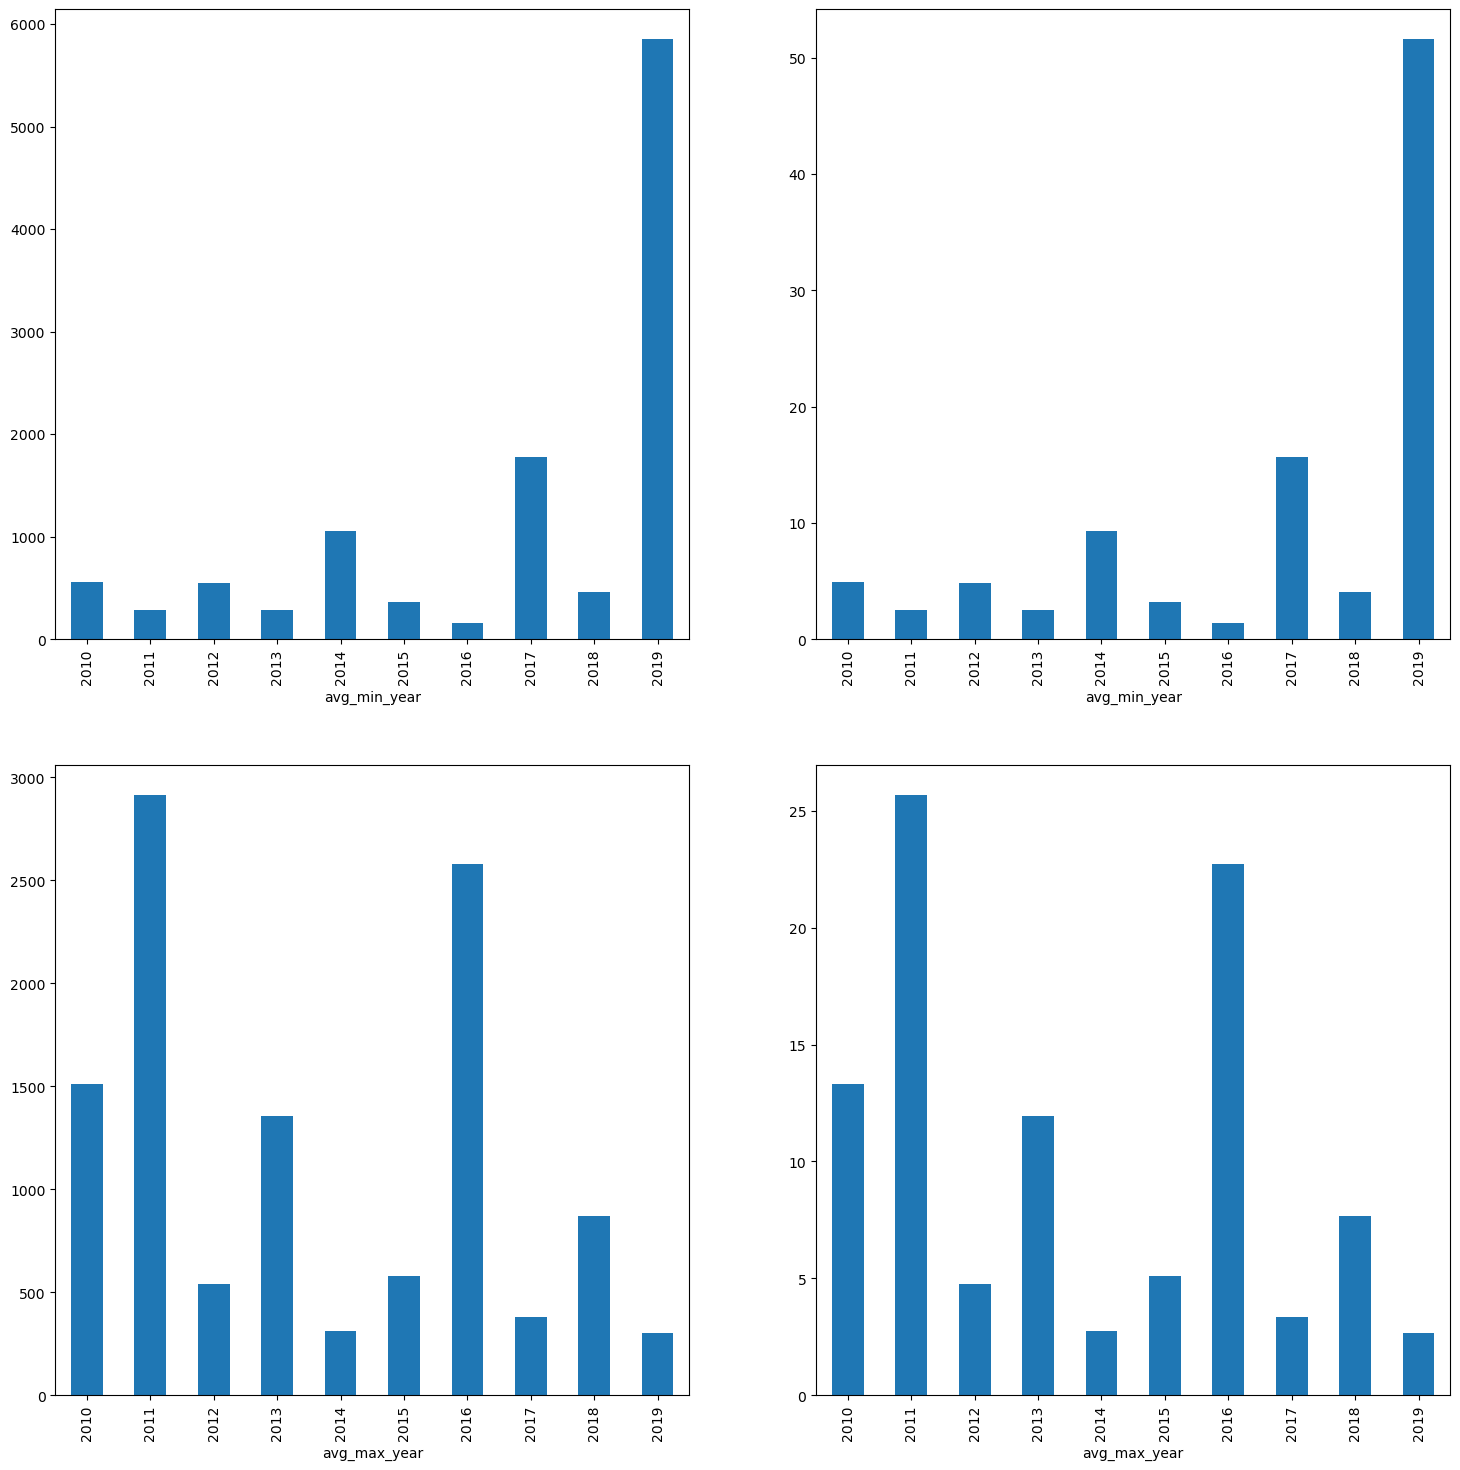

In [34]:
fig, ax = plt.subplots(figsize=[18, 18], nrows=2, ncols=2)

(
    df_ms_abs_delta["avg_min_year"]
    .value_counts()
    .sort_index()
    .plot(kind='bar', ax=ax[0, 0])
    )
(
    df_ms_abs_delta["avg_min_year"]
    .value_counts(normalize=True)
    .sort_index()
    .mul(100)
    .plot(kind='bar', ax=ax[0, 1])
    )
(
    df_ms_abs_delta["avg_max_year"]
    .value_counts()
    .sort_index()
    .plot(kind='bar', ax=ax[1, 0])
    )
(
    df_ms_abs_delta["avg_max_year"]
    .value_counts(normalize=True)
    .sort_index()
    .mul(100)
    .plot(kind='bar', ax=ax[1, 1])
    )

In [35]:
df_ms_abs_delta.isna().sum()

messstelle_id            0
name                     0
e32                      0
n32                      0
turnus_wasserstand       0
freigabe_wstd            0
freigabe_chemie          0
freigabe_lage            0
messstellenart           0
avg_2010               925
avg_2011               887
avg_2012               965
avg_2013               943
avg_2014               847
avg_2015               724
avg_2016               706
avg_2017               752
avg_2018               836
avg_2019              1114
avg_min_year             0
avg_max_year             0
dtype: int64

In [36]:
df_ms_abs_delta.shape

(11348, 21)

## Analyse der Grundwasserstandsentwicklung zwischen 2010 und 2019
In der folgenden Analyse wird die Differenz der gemittelten Grundwasserstände zwischen den Jahren 2010 und 2019 berechnet. Diese Differenz beschreibt die absolute Veränderung des Grundwasserstands und ermöglicht somit eine Bewertung des langfristigen Trends. Die ermittelten absoluten Änderungen werden anschließend in sieben Klassen eingeteilt und deren Häufigkeiten bestimmt. Durch die Darstellung der Klassenhäufigkeiten in einem Balkendiagramm lassen sich die globalen Trends der Grundwasserentwicklung anschaulich ablesen.

In [37]:
df_ms_abs_delta.loc[:, 'trend_2019-2010'] = df_ms_abs_delta.loc[:, 'avg_2019'] - df_ms_abs_delta.loc[:, 'avg_2010']

In [38]:
df_ms_abs_delta['trend_2019-2010'].describe()

count    9442.000000
mean       -0.592664
std         2.430900
min      -177.926071
25%        -0.752180
50%        -0.470001
75%        -0.220001
max        63.013733
Name: trend_2019-2010, dtype: float64

In [39]:
df_ms_abs_delta.loc[:, "trend_2019-2010_class"] = pd.cut(
    df_ms_abs_delta.loc[:, "trend_2019-2010"],
    bins=[-13, -5, -2, -1, 1, 2, 5, 13],
    labels=[1, 2, 3, 4, 5, 6, 7],
    include_lowest=True
)

In [40]:
df_ms_abs_delta.head()

,messstelle_id,name,e32,n32,turnus_wasserstand,freigabe_wstd,freigabe_chemie,freigabe_lage,messstellenart,avg_2010,...,avg_2014,avg_2015,avg_2016,avg_2017,avg_2018,avg_2019,avg_min_year,avg_max_year,trend_2019-2010,trend_2019-2010_class
2,070283916,LGD BN KOTTENF. 3,362354,5615873,monatlich,ja,ja,ja,GW-Messstelle,157.968262,...,157.759216,158.256668,158.860764,158.398453,158.025009,157.676666,2013,2016,-0.291595,4
3,010445730,60BP010505,291150,5669250,vierzehntäglich,ja,nein,nein,GW-Messstelle,NaN,...,30.473974,30.436245,29.735682,29.705078,29.631495,29.627205,2019,2012,NaN,NaN
4,010445791,60BP010701,290850,5665750,vierzehntäglich,ja,nein,nein,GW-Messstelle,30.927084,...,30.810970,30.860708,31.071995,30.650002,30.614887,30.416910,2019,2011,-0.510174,4
6,010446722,60GP012301,292050,5645350,monatlich,ja,nein,nein,GW-Messstelle,81.496254,...,80.842194,NaN,NaN,81.446419,81.499199,81.437012,2014,2018,-0.059242,4
7,100151115,WE 33 WEHE,478750,5808550,monatlich,ja,nein,nein,GW-Messstelle,39.873333,...,39.598331,39.764999,40.063335,39.716667,39.887501,39.774998,2012,2016,-0.098335,4


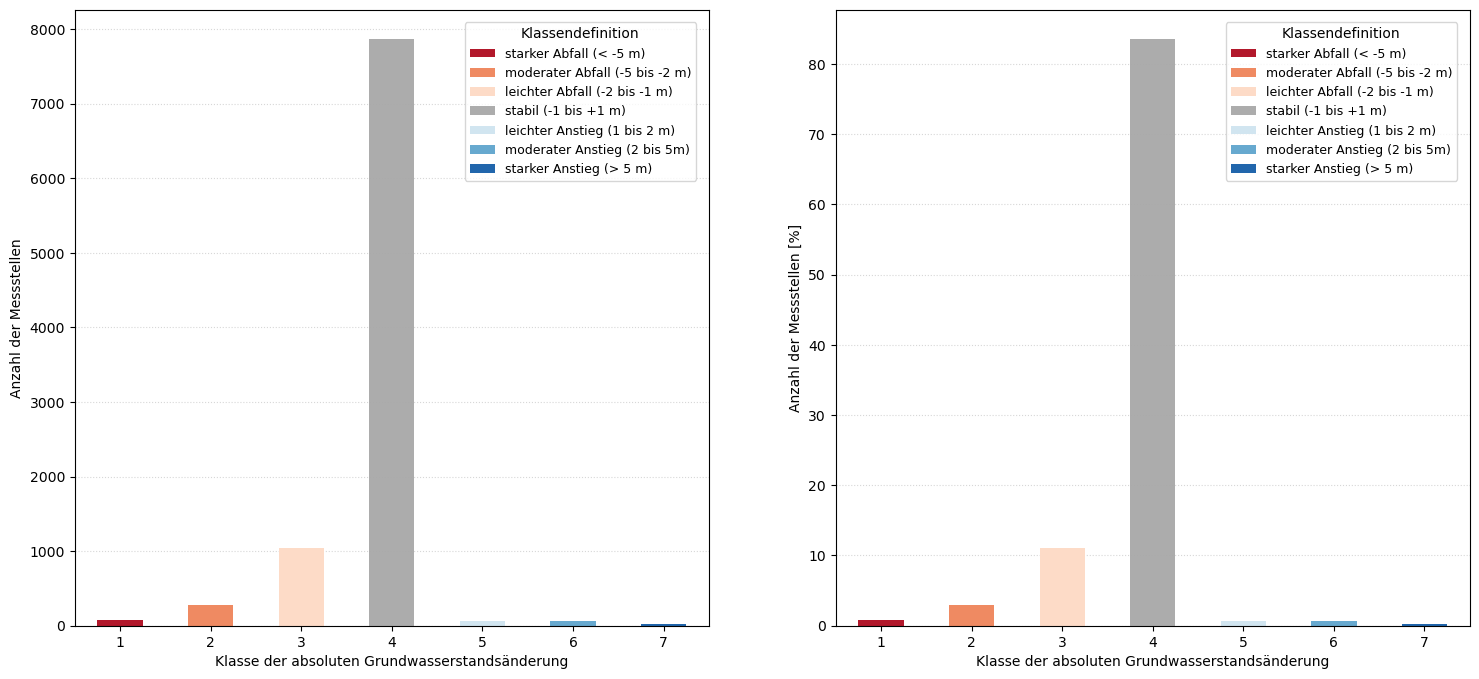

In [41]:
farbklassen = {
    1: {"farbe": "#b2182b", "label": "starker Abfall (< -5 m)"},
    2: {"farbe": "#ef8a62", "label": "moderater Abfall (-5 bis -2 m)"},
    3: {"farbe": "#fddbc7", "label": "leichter Abfall (-2 bis -1 m)"},
    4: {"farbe": "#a7a7a7ef", "label": "stabil (-1 bis +1 m)"},
    5: {"farbe": "#d1e5f0", "label": "leichter Anstieg (1 bis 2 m)"},
    6: {"farbe": "#67a9cf", "label": "moderater Anstieg (2 bis 5m)"},
    7: {"farbe": "#2166ac", "label": "starker Anstieg (> 5 m)"},
}

counts = (
    df_ms_abs_delta["trend_2019-2010_class"]
    .astype("Int64")
    .value_counts()
    .reindex(farbklassen.keys(), fill_value=0)
)

farben_liste = [farbklassen[k]["farbe"] for k in counts.index]

fig, ax = plt.subplots(figsize=[18, 8], nrows=1, ncols=2)
(
    df_ms_abs_delta.loc[:,'trend_2019-2010_class']
    .value_counts(normalize=False)
    .sort_index()
    .plot(kind='bar', ax=ax[0], color=farben_liste)
    )
(
    df_ms_abs_delta.loc[:,'trend_2019-2010_class']
    .value_counts(normalize=True)
    .sort_index()
    .mul(100)
    .plot(kind='bar', ax=ax[1], color=farben_liste)
    )
for axes in range(2):

    handles = [
        Patch(
            facecolor=patch.get_facecolor(),
            label=farbklassen[i]['label']
        )
        for i, patch in zip(counts.index, ax[axes].patches)
        ]
    
    ax[axes].grid(True, linestyle=':', alpha=0.5, axis='y')
    ax[axes].set_axisbelow(True)
    ax[axes].set_xlabel('Klasse der absoluten Grundwasserstandsänderung', fontsize=10)
    ax[axes].set_xticklabels(['1', '2', '3', '4', '5', '6', '7'], rotation=0)

    if axes == 0:
        ax[axes].set_ylabel('Anzahl der Messstellen', fontsize=10)
    if axes == 1:
        ax[axes].set_ylabel('Anzahl der Messstellen [%]', fontsize=10)

    ax[axes].legend(
        handles=handles,
        title="Klassendefinition",
        loc="upper right",
        fontsize=9,
        bbox_to_anchor=(0.98, 0.98),
        borderaxespad=0
    )

<Axes: >

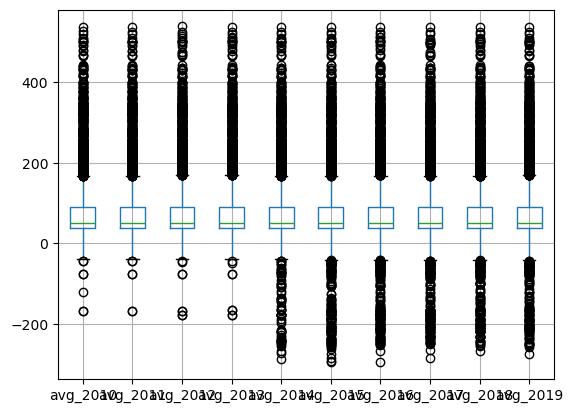

In [42]:
df_ms_abs_delta[avg_year].boxplot()

## Export und Aufbereitung der Ergebnisse für QGIS
Die Analyse der totalen Grundwasseränderungen zwischen 2010 und 2019 erfolgte zunächst für jede Messstelle separat. Zwar lässt sich mithilfe der Klassifizierung ein globaler Trend ableiten, die Zusammenhänge zwischen den Messstellen sind jedoch räumlicher Natur. In den folgenden Zellen werden die aufbereiteten Daten für Geoinformationssysteme wie QGIS exportiert. Dies ermöglicht eine räumliche Analyse und den direkten Vergleich der Grundwassermessstellen untereinander.

In [43]:
df_ms_abs_delta.head()

,messstelle_id,name,e32,n32,turnus_wasserstand,freigabe_wstd,freigabe_chemie,freigabe_lage,messstellenart,avg_2010,...,avg_2014,avg_2015,avg_2016,avg_2017,avg_2018,avg_2019,avg_min_year,avg_max_year,trend_2019-2010,trend_2019-2010_class
2,070283916,LGD BN KOTTENF. 3,362354,5615873,monatlich,ja,ja,ja,GW-Messstelle,157.968262,...,157.759216,158.256668,158.860764,158.398453,158.025009,157.676666,2013,2016,-0.291595,4
3,010445730,60BP010505,291150,5669250,vierzehntäglich,ja,nein,nein,GW-Messstelle,NaN,...,30.473974,30.436245,29.735682,29.705078,29.631495,29.627205,2019,2012,NaN,NaN
4,010445791,60BP010701,290850,5665750,vierzehntäglich,ja,nein,nein,GW-Messstelle,30.927084,...,30.810970,30.860708,31.071995,30.650002,30.614887,30.416910,2019,2011,-0.510174,4
6,010446722,60GP012301,292050,5645350,monatlich,ja,nein,nein,GW-Messstelle,81.496254,...,80.842194,NaN,NaN,81.446419,81.499199,81.437012,2014,2018,-0.059242,4
7,100151115,WE 33 WEHE,478750,5808550,monatlich,ja,nein,nein,GW-Messstelle,39.873333,...,39.598331,39.764999,40.063335,39.716667,39.887501,39.774998,2012,2016,-0.098335,4


In [44]:
# Export DataFrame to CSV and Pickle
df_ms_abs_delta.to_csv("../data/processed/grundwasserdaten-NRW/GW-MessstellenTotalTrendGIS.csv", float_format="%.3f")
df_ms_abs_delta.to_pickle("../data/processed/grundwasserdaten-NRW/GW-MessstellenTotalTrendGIS.pkl")